In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
#Download the dataset from gdrive link https://drive.google.com/file/d/1m0IIwzeG4K9eOeWPj_9qqG-ZV0Dp0Ebt/view?usp=sharing
!gdown --id 1m0IIwzeG4K9eOeWPj_9qqG-ZV0Dp0Ebt

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m0IIwzeG4K9eOeWPj_9qqG-ZV0Dp0Ebt
To: /content/bank.csv
100% 6.42M/6.42M [00:00<00:00, 7.02MB/s]


In [3]:
dataset = pd.read_csv('bank.csv', sep=';')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
45303,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
45304,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
45305,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
dataset = pd.DataFrame(dataset)
dataset.replace(r'unknown', np.nan, inplace = True)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
dataset.isnull().sum()

age                  0
job                369
marital             91
education         1898
default           9400
housing           1095
loan              1095
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [6]:
dataset = dataset.dropna(axis=1)
dataset.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
dataset = dataset.drop('poutcome', axis=1)
dataset.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,40.032203,258.148917,2.564835,962.288785,0.174543,0.082166,93.576032,-40.502282,3.621297,5166.985525
std,10.411407,258.864200,2.752261,187.370863,0.499364,1.570231,0.578881,4.625101,1.734350,72.380791
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


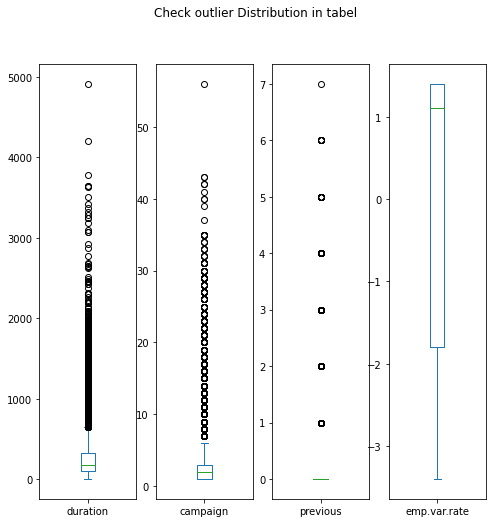

In [9]:
outlier = dataset[['duration','campaign','previous','emp.var.rate']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,4),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')
plt.show()

In [10]:
# Duration
duration = np.where(dataset['duration'] >= (4000))
# Campaign
campaign = np.where(dataset['campaign'] >= (45))

dataset.drop(duration[0], inplace = True)
dataset.drop(campaign[0], inplace = True)
 
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000,45304.000000
mean,40.032271,257.959010,2.563681,962.286354,0.174554,0.082119,93.576034,-40.502437,3.621222,5166.983010
std,10.411479,257.279915,2.740868,187.376829,0.499379,1.570263,0.578894,4.625162,1.734383,72.382403
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,3785.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
dataset2 = pd.get_dummies(dataset)
dataset2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
lEncoder = LabelEncoder()
dataset['contact'] = lEncoder.fit_transform(dataset['contact'])
dataset['month'] = lEncoder.fit_transform(dataset['month'])
dataset['day_of_week'] = lEncoder.fit_transform(dataset['day_of_week'])
dataset['y'] = lEncoder.fit_transform(dataset['y'])


dataset.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


CORRELATION MATRIX

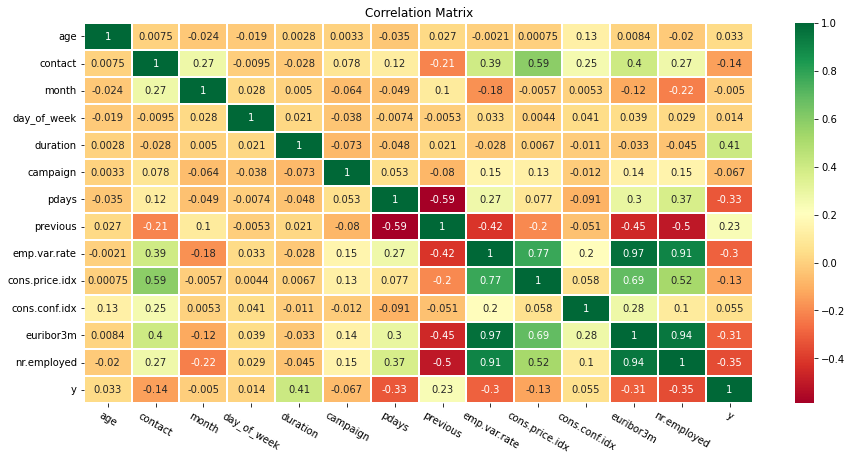

In [13]:
import seaborn as sns
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

PCA

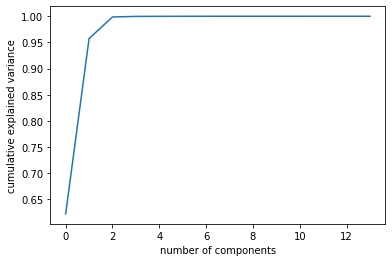

In [14]:
from sklearn.decomposition import PCA # for PCA calculation
pca = PCA()
X_pca = pca.fit(dataset)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(dataset) # this will fit and reduce dimensions
print(f"number of coulmn recommended : ", pca.n_components_)

number of coulmn recommended :  3


In [16]:
pd.DataFrame(pca.components_, columns = dataset.columns)

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000196,-0.000067,0.000080,0.000114,0.996831,-0.000818,-0.076941,0.000111,-0.000296,-0.000001,-0.000111,-0.000372,-0.020150,0.000523
1,0.001947,-0.000328,0.000744,0.000024,-0.079191,-0.000769,-0.983736,0.001588,-0.002633,-0.000330,0.002057,-0.003160,-0.161132,0.000493
2,0.000829,-0.001699,0.007664,-0.000745,-0.007433,-0.005405,0.162246,0.002042,-0.020128,-0.004556,-0.010541,-0.023006,-0.986132,0.001049


In [17]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = dataset.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

print(f"most important columns : ", most_important_names)

most important columns :  ['duration', 'pdays', 'nr.employed']


EXPLORATORY DATA ANALYSIS

In [18]:
dataset3 = dataset

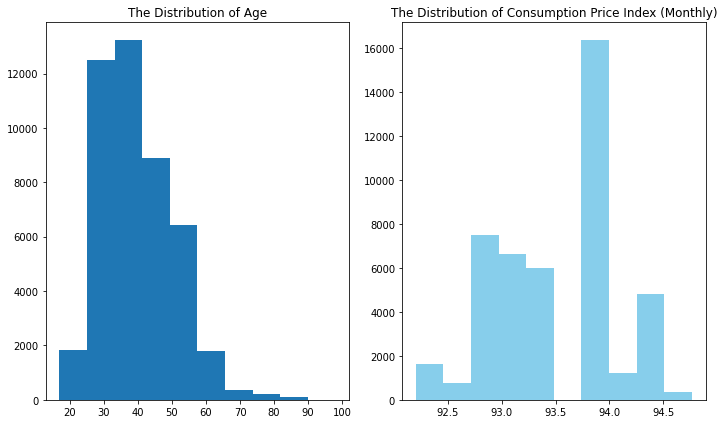

In [19]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset3['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(dataset3['cons.price.idx'], color = 'skyblue')
ra2.set_title('The Distribution of Consumption Price Index (Monthly)')

plt.tight_layout() 
plt.show()

In [20]:
lst = [dataset3]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [21]:
dataset.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,30.0
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40.0
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0


In [22]:
count_age_response_pct = pd.crosstab(dataset3['y'],dataset3['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [23]:
age = pd.DataFrame(dataset3['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

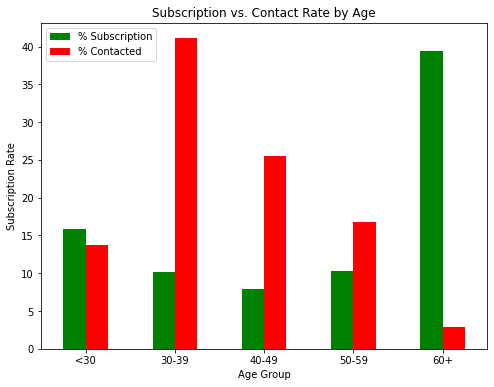

In [24]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

#2

In [25]:
dataset4 = dataset3

In [26]:
dataset4.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,30.0
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40.0
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0


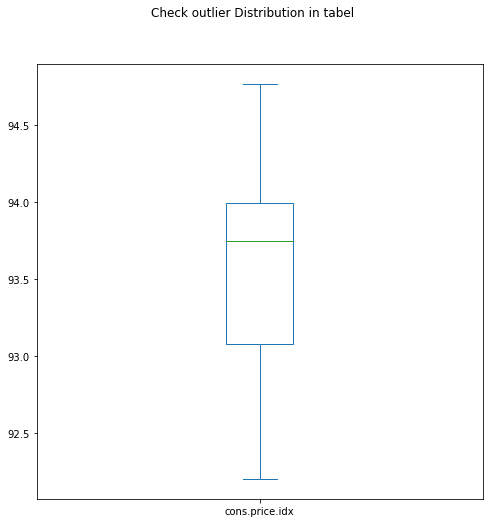

In [27]:
sebaran_data = dataset[['cons.price.idx']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,1),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')
plt.show()

In [28]:
lst2 = [dataset4]
for column in lst2:
    column.loc[column["cons.price.idx"] <= 0,  'cons.price.idx_group'] = 'no consumption index'
    column.loc[(column["cons.price.idx"] > 0) & (column["cons.price.idx"] <= 93.5), 'cons.price.idx_group'] = 'low consumption index'
    column.loc[(column["cons.price.idx"] > 93.5), 'cons.price.idx_group'] = 'high consumption'

In [29]:
# Step 1: Change column name: 'y' to 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

In [30]:
lst2 = [dataset4]
for column2 in lst2:
    column2.loc[column2["response"] == 0, "response_binary"] = "no"
    column2.loc[column2["response"] == 1, "response_binary"] = "yes"

In [31]:
dataset4.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_group,cons.price.idx_group,response_binary
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0,high consumption,no
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0,high consumption,no
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,30.0,high consumption,no
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,40.0,high consumption,no
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,50.0,high consumption,no


In [32]:
count_balance_response_pct = pd.crosstab(dataset4['response_binary'],dataset4['cons.price.idx_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [33]:
count_balance_response_pct

response_binary,no,yes
cons.price.idx_group,,
high consumption,91.222364,8.777636
low consumption index,86.285638,13.714362


In [34]:
bal = pd.DataFrame(dataset4['cons.price.idx_group'].value_counts())
bal['% Contacted'] = bal['cons.price.idx_group']*100/bal['cons.price.idx_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('cons.price.idx_group',axis = 1,inplace = True)

bal['bal'] = [1,2]
bal = bal.sort_values('bal',ascending = True)

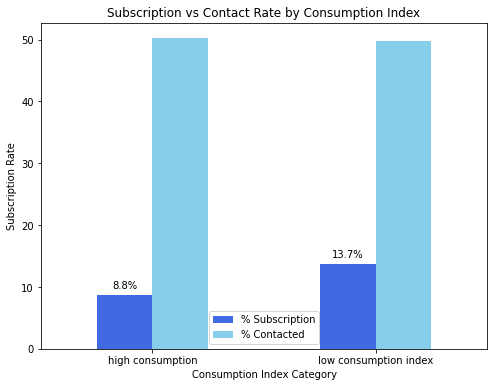

In [35]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Consumption Index')
plt.ylabel('Subscription Rate')
plt.xlabel('Consumption Index Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

DIKEMBALIKAN

In [36]:
# Step 1: Change column name: 'y' to 'response'
dataset.rename(index=str, columns={'response': 'y'}, inplace = True)

In [37]:
dataset = dataset.drop(['age_group','cons.price.idx_group','response_binary'], axis=1)

In [38]:
dataset.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
dataset = MinMaxScaler().fit_transform(dataset)
dataset = pd.DataFrame(dataset)

dataset.head()

In [42]:
x = dataset.iloc[:, :12]
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.481481,1.0,0.666667,0.25,0.068956,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
1,0.493827,1.0,0.666667,0.25,0.039366,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
2,0.246914,1.0,0.666667,0.25,0.059709,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
3,0.283951,1.0,0.666667,0.25,0.039894,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379
4,0.481481,1.0,0.666667,0.25,0.081110,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379


In [43]:
y = dataset.iloc[:, 13]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 13, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [45]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [51]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.909858 (0.005657)


In [52]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [57]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9121509767133871


[[7867  176]
 [ 620  398]]


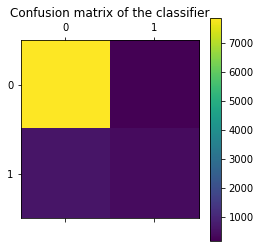

In [55]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [56]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      8043
         1.0       0.69      0.39      0.50      1018

    accuracy                           0.91      9061
   macro avg       0.81      0.68      0.73      9061
weighted avg       0.90      0.91      0.90      9061

